# Chemical Oceanography (CO)

<img src="rosette-launch.jpeg"/>


This tutorial is part of our Chemical Oceanography day. It demonstrates how to do basic analysis and visualization of chemical element observations in the ocean. We will use A,B,and C data which can be downloaded using CMAP API, a giant data database for Earth system observations and modeling. To download the data using API, please register at CMAP and generate your API key.

### Estimated tutorial time: 1.5 hours

## Tutorial goals

- Python Skills
    - Work with dataframes
    - Make different statistical plots
    - Data co-location
- CO knowledge
    - Learn the distribution of nutrients in the ocean 
    - Understand the acidification and deoxygenation in the ocean
    
## Reading 

https://www.noaa.gov/education/resource-collections/ocean-coasts/ocean-acidification

# Let's start!

In [ ]:
import pandas as pd
import numpy as np
import pycmap
import plotly.express as px

import matplotlib.pyplot as plt

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

### Call API

#### get api key by registering for account on simonscmap.com then going to https://simonscmap.com/apikeymanagement

In [3]:
# call api using your unique api key
key = '68485f40-0458-11ed-b189-4fe042c5db72'
api = pycmap.API(token=key)

In [63]:
# get catalog of all datasets- very long
api.get_catalog()
# search for a dataset with a specific keyword
api.search_catalog('light')

,Variable,Table_Name,Long_Name,Unit,Make,Sensor,Process_Level,Study_Domain,Temporal_Resolution,Spatial_Resolution,...,Dataset_Name,Dataset_Short_Name,Data_Source,Distributor,Dataset_Description,Acknowledgement,Dataset_ID,ID,Visualize,Keywords
0,Light_Quanta_m2_sec_AMT13,tblAMT13_Chisholm,Light level,Quanta/(m2 x sec),Observation,CTD,Reprocessed,Chemistry+Biology+Biogeochemistry,Irregular,Irregular,...,AMT13 Prochlorococcus and Synechococcus Abundance,AMT13_Prochlorococcus_Abundance,"Plymouth Marine Laboratory, NERC, Chisholm Lab",NaN,Atlantic Meridional Transect cruise 13: Prochl...,We would like to acknowledge C. Robinson and t...,318,4414,1.0,"AMT, AMT13, atlantic, atlantic meridional tran..."
1,Attn_Red_25cm,tblJC079_AMT22_CTD,Beam Attenuation (Red Light Wavelength),/m,Observation,CTD,Reprocessed,Biogeochemistry,Irregular,Irregular,...,AMT22 (JC079) CTD Profiles,JC079_AMT22_CTD,https://www.bodc.ac.uk/data/documents/cruise/1...,British Oceanographic Data Centre (BODC),This dataset consists of 74 CTD profiles colle...,"Thomas, Rob. Contains data supplied by the Nat...",474,8058,1.0,"Atlantic Meridional Transect, cruise, in situ,..."
2,Attn_Red_25cm_Flag,tblJC079_AMT22_CTD,Flag for Beam Attenuation (Red Light Wavelength),NaN,Observation,CTD,Reprocessed,Biogeochemistry,Irregular,Irregular,...,AMT22 (JC079) CTD Profiles,JC079_AMT22_CTD,https://www.bodc.ac.uk/data/documents/cruise/1...,British Oceanographic Data Centre (BODC),This dataset consists of 74 CTD profiles colle...,"Thomas, Rob. Contains data supplied by the Nat...",474,8059,NaN,"Atlantic Meridional Transect, cruise, in situ,..."
3,Trans_Red_25cm,tblJC079_AMT22_CTD,Beam Transmittance (Red Light Wavelength),%,Observation,CTD,Reprocessed,Biogeochemistry,Irregular,Irregular,...,AMT22 (JC079) CTD Profiles,JC079_AMT22_CTD,https://www.bodc.ac.uk/data/documents/cruise/1...,British Oceanographic Data Centre (BODC),This dataset consists of 74 CTD profiles colle...,"Thomas, Rob. Contains data supplied by the Nat...",474,8068,1.0,"Atlantic Meridional Transect, cruise, in situ,..."
4,Trans_Red_25cm_Flag,tblJC079_AMT22_CTD,Flag for Beam Transmittance (Red Light Wavelen...,NaN,Observation,CTD,Reprocessed,Biogeochemistry,Irregular,Irregular,...,AMT22 (JC079) CTD Profiles,JC079_AMT22_CTD,https://www.bodc.ac.uk/data/documents/cruise/1...,British Oceanographic Data Centre (BODC),This dataset consists of 74 CTD profiles colle...,"Thomas, Rob. Contains data supplied by the Nat...",474,8069,NaN,"Atlantic Meridional Transect, cruise, in situ,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,leu_incorporation_light,tblHOT229_251_leu_incorp,leucine incorporation light,pmol Leu/l/hr,Observation,In-Situ,Reprocessed,Biogeochemistry,Irregular,Irregular,...,Time series measurements of leucine incorporat...,HOT229_251_leu_incorp,"Matthew Church, Univ Montana",NaN,Samples were collected at or in the vicinity o...,This work was funded by the Simons Foundation ...,207,2916,1.0,"H3 leucine incorporation_light, Hawaii Ocean T..."
267,leu_incorporation_light_stdev,tblHOT229_251_leu_incorp,leucine incorporation light standard deviation,pmol Leu/l/hr,Observation,In-Situ,Reprocessed,Biogeochemistry,Irregular,Irregular,...,Time series measurements of leucine incorporat...,HOT229_251_leu_incorp,"Matthew Church, Univ Montana",NaN,Samples were collected at or in the vicinity o...,This work was funded by the Simons Foundation ...,207,2917,NaN,"H3 leucine incorporation_light stdev, Hawaii O..."
268,C14_assimilation_light_EOC,tblHOT221_247_14C_PP_EOC,14C assimilation light extracellular organic c...,umol C/l/d,Observation,In-Situ,Reprocessed,Biogeochemistry,Irregular,Irregular,...,Time-series rates of dissolved organic carbon ...,HOT221_247_14C_PP_EOC,"Matthew Church, Univ Montana",NaN,"Over a 3-year period (April 2010-April 2013), ...",This work was funded by the Simons Foundation ...,206,2909,1.0,"C14-extracellular organic carbon, carbon fixat..."
269,C14_assimilatio

### Seaflow dataset

### HOT dataset

In [14]:
# read in hawaii ocean time series (HOT) data (1998-2019)
## https://simonscmap.com/catalog/datasets/HOT_PP
HOT = api.get_dataset('tblHOT_PP')
print(f'HOT columns only: {HOT.columns.values.tolist()}\n')
# this dataset also has pre-colcalized ancilliary data
HOT_all = api.get_dataset_with_ancillary("tblHOT_PP")

HOT columns only: ['time', 'lat', 'lon', 'depth', 'cruise_name', 'chl_hot', 'phaeopigments_hot', 'itype', 'light_12_hot', 'dark_12_hot', 'salinity_hot', 'prochlorococcus_hot', 'heterotrophic_bacteria_hot', 'synechococcus_hot', 'eukaryotes_hot']



In [4]:
HOT_bottle = api.get_dataset('tblHOT_Bottle')

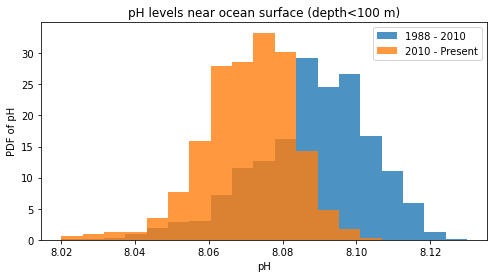

In [179]:
plt.figure(figsize=(8,4))
plt.hist(HOT_bottle.loc[HOT_bottle['time'] < '2010'].loc[HOT_bottle['depth'] <100]['ph_bottle_hot'], bins=np.linspace(8.02, 8.13, 20),alpha=0.8, density=True);
plt.hist(HOT_bottle.loc[HOT_bottle['time'] > '2010'].loc[HOT_bottle['depth'] <100]['ph_bottle_hot'], bins=np.linspace(8.02, 8.13, 20), alpha=0.8, density=True);
plt.legend(('1988 - 2010','2010 - Present'))
plt.title('pH levels near ocean surface (depth<100 m)')
plt.xlabel('pH')
plt.ylabel('PDF of pH');
plt.savefig('acidification.pdf')

## Redfield Ratio 

<img src="organisms.png"/>

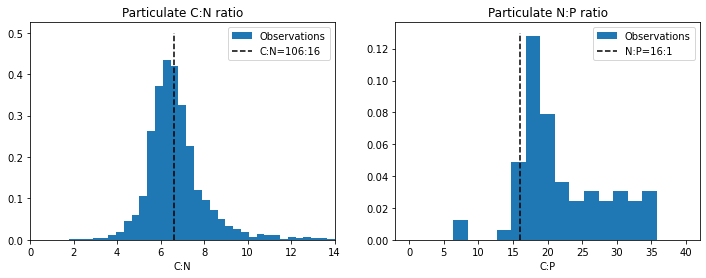

In [195]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(HOT_bottle['pc_bottle_hot']/HOT_bottle['pn_bottle_hot'],
         bins=np.linspace(0,14,40),density=True,
         label='Observations');
plt.plot([106/16, 106/16],[0, 0.5],'k--',label='C:N=106:16')
plt.legend()
plt.title('Particulate C:N ratio')
plt.xlabel('C:N')

plt.xlim((0,14));

plt.subplot(1,2,2)
plt.hist(HOT_bottle['pn_bottle_hot']/(1e-3*HOT_bottle['pp_bottle_hot']),
         label='Observations',
         bins=np.linspace(0,40,20),density=True);
plt.plot([16, 16],[0, 0.13],'k--',label='N:P=16:1')
plt.legend()
plt.xlabel('C:P')
plt.title('Particulate N:P ratio');
plt.savefig('Redfield.pdf')